# 1. The Convolution Operation in Image Processing

### About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.0 (27/12/2022)

**Requirements:**
- Python 3 (tested on v3.9.6)
- Matplotlib (tested on v3.5.1)
- Numpy (tested on v1.22.1)
- Pillow (tested on v9.3.0)
- Scipy (tested on v1.9.3)

### Imports

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
# Numpy
import numpy as np
# Pillow
from PIL import Image
# Scipy
from scipy.signal import correlate

### Loading an image for testing

To discuss the convolution operation, we will first load an image, from file, using the prompt below.

In [2]:
# Open the image and convert it to grayscale
im = Image.open('flower.jpg').convert('L')

# Convert the image to a NumPy array
im_array = np.array(im)

# Print the shape of the array
print(im_array.shape)

(459, 612)


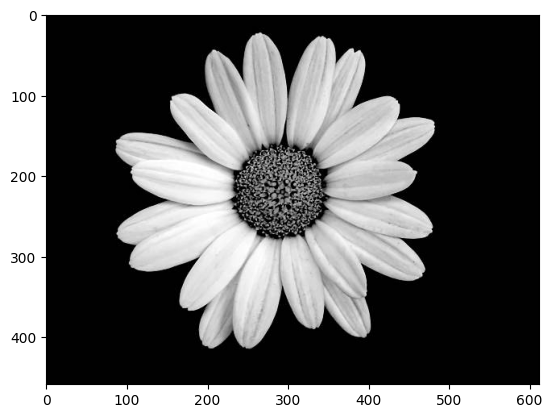

In [3]:
# Display image in matplotlib
plt.imshow(im_array, cmap = 'gray')
plt.show()

### The convolution operation, explained

Convolution is a mathematical operation that is used to compute the output of a linear filter from an input image. It is a fundamental operation in image processing and computer vision, and is used to apply various kinds of image filters, such as blur, sharpen, edge detection, and so on. In the context of image processing, convolution is used to extract features from an image by applying a set of weights (also known as a kernel or filter) to each pixel in the image. The result of the convolution operation is a new image, where each pixel is a weighted sum of the pixels in the original image.

The convolution operation is applied to each pixel in the image, with the kernel being moved across the entire image. At each position, the kernel is multiplied element-wise with the pixels under it, and then the sum of these products is taken as the output value for that position.

In practice, the kernel is typically small, defined as a square matrix with odd dimensions (typically, $3 \times 3$ or $5 \times 5$) and the convolution is applied only over the valid pixels of the image.

Below, we have a $ 5 \times 5 $ image (in blue), being convolved by a $ 3 \times 3 $ kernel $ K $ (not shown), with values set as

$$ K = \frac{1}{9} \left( \begin{array}{ccc} 1 & 1 & 1 \\
1 & 1 & 1\\
1 & 1 & 1\\
\end{array} \right)$$

The result is a $ 3 \times 3 $ image (in green), and the pixel values are calculated by summing and averaging all the pixel values in the dark blue neighbourhood (rounded to one decimal). Do note that the image size has decreased after the convolution operation (from $ 5 \times 5 $ to $ 3 \times 3 $).

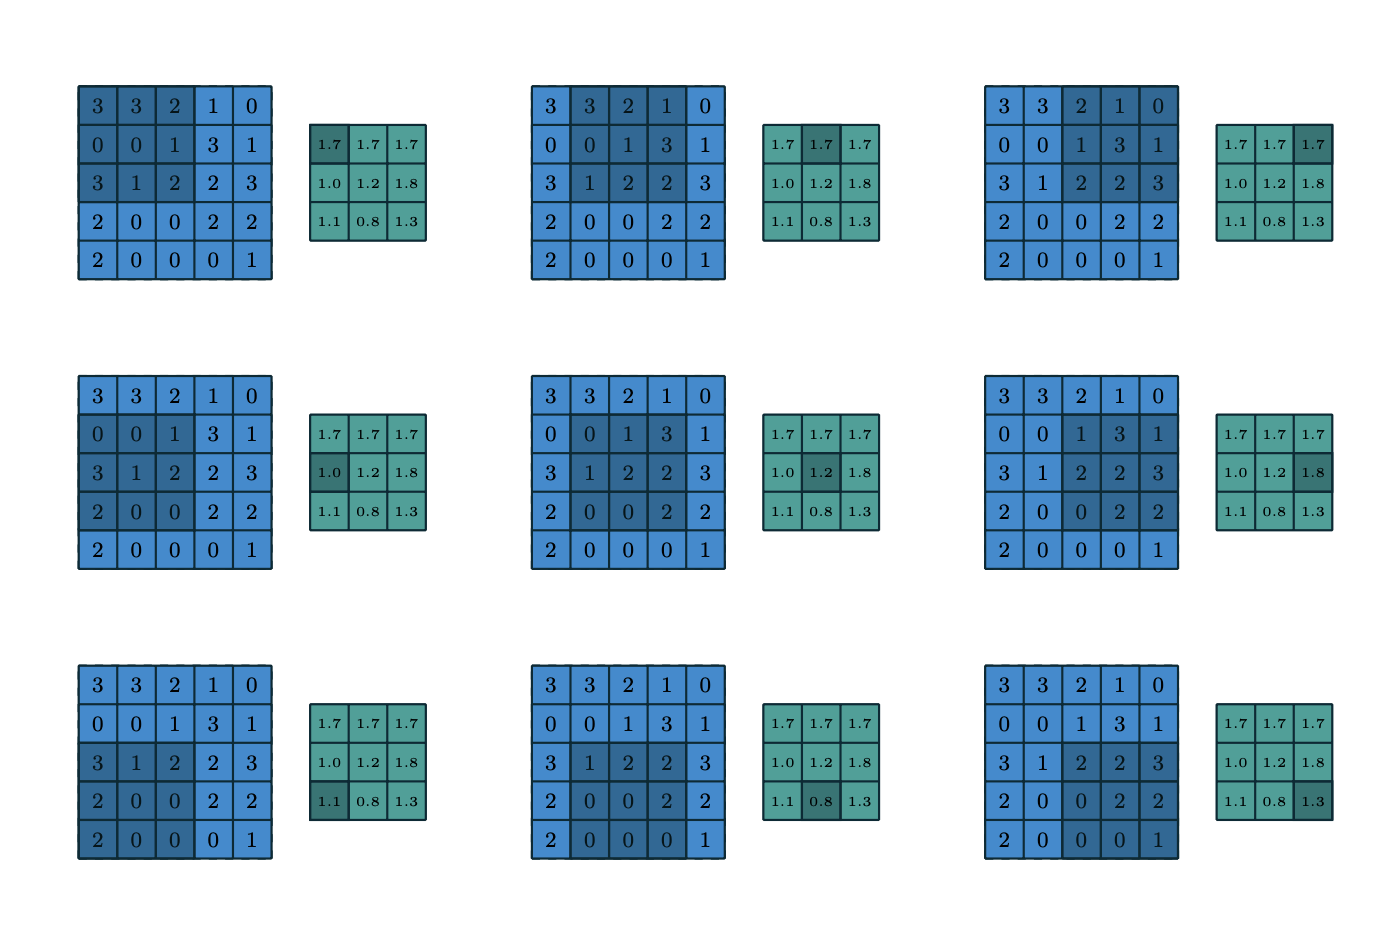

We implement the convolution operation in the function below.

In [4]:
# Our convolution function
def convolution(image, kernel):
    # Flip the kernel (optional)
    kernel = np.flipud(np.fliplr(kernel))
    
    # Get the dimensions of the image and kernel
    image_rows, image_cols = image.shape
    kernel_rows, kernel_cols = kernel.shape
    
    # Convolve using Numpy
    output = correlate(image, kernel, mode = 'valid')
    
    # Note that this is equivalent to this
    '''
    # Loop through the image, applying the convolution
    output = np.zeros_like(image)
    for x in range(image_rows - kernel_rows + 1):
        for y in range(image_cols - kernel_cols + 1):
            output[x, y] = (kernel * image[x:x+kernel_rows, y:y+kernel_cols]).sum()
    '''
    return output

The magic for this operation then happens when deciding on a kernel to use. The kernel below will typically produce a new image, which consists of a blurred version of the input one. This is a typical image processing operation, commonly refered to as the blur kernel. The kernel simply consists of a square matrix, here defined as a $ 5 \times 5 $ one, containing constant values an equal values, summing up to 1. This kernel is applied to each pixel in the image by performing a 2-dimensional convolution with the image. The resulting value for each pixel is the average of the pixel values in its local neighborhood.

In [5]:
# Blur
kernel = np.array([[1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1]])/25
image_conv = convolution(im_array, kernel)
print(image_conv.shape)

(455, 608)


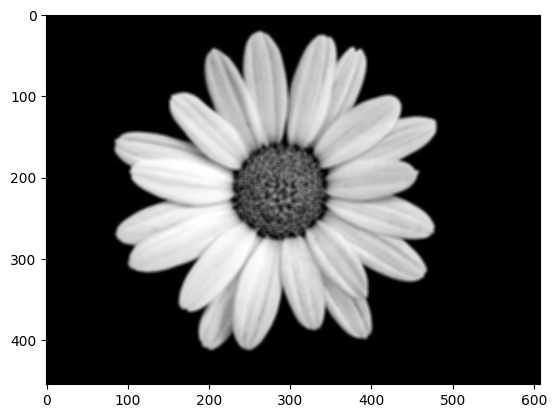

In [6]:
# Display image in matplotlib
plt.imshow(image_conv, cmap = 'gray')
plt.show()

The effect of this transformation is an image that looks blurred, as shown below.

In [7]:
# Blur
kernel = np.array([[1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1]])/25
image_conv_more = convolution(image_conv, kernel)
print(image_conv_more.shape)

(451, 604)


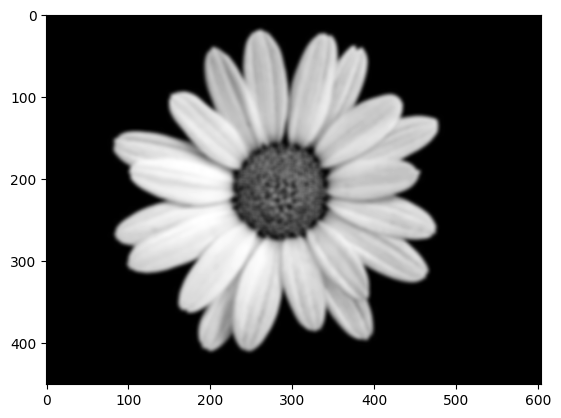

In [8]:
# Display image in matplotlib
plt.imshow(image_conv_more, cmap = 'gray')
plt.show()

Convolutions can be applied multiple times in a row to increase the image transformation even more.

In [9]:
# Blur
kernel = np.array([[1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1]])/25
image_conv_even_more = convolution(image_conv_more, kernel)
print(image_conv_even_more.shape)

(447, 600)


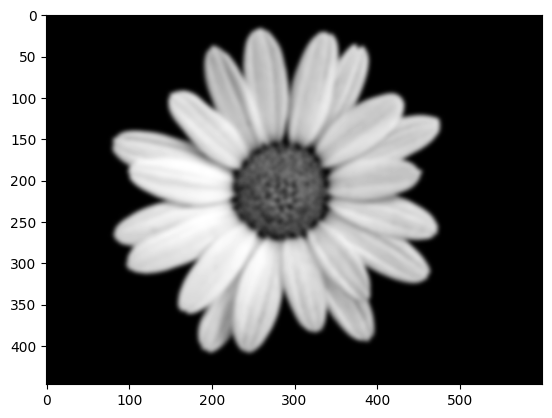

In [10]:
# Display image in matplotlib
plt.imshow(image_conv_even_more, cmap = 'gray')
plt.show()

### Using the convolution operation for edge detection

Edge detection is a technique used in image processing to identify boundaries or edges in an image. One way to perform edge detection using convolutions is by applying a filter that is sensitive to changes in pixel intensity values.

The most common filter used for edge detection is the Prewitt filter, which is a $ 3 \times 3 $ convolution kernel that is applied to each pixel in the image. The Prewitt filter is designed to detect edges in the horizontal and vertical directions and can be represented by the following kernels:

$$ \left( \begin{array}{ccc} -1  & 0 & 1 \\
-1  & 0 & 1\\
-1  & 0 & 1\\
\end{array} \right)$$

and

$$ \left( \begin{array}{ccc} 1  & 1 & 1 \\
0 & 0 & 0\\
-1 & -1 & 1\\
\end{array} \right)$$

These kernels are applied to the image by performing a 2-dimensional convolution with the image. The resulting value for each pixel is an approximation of the gradient magnitude in the horizontal or vertical direction, which will correspond to image locations where there is a drastic change in the value of pixels (or in other words, an edge).

We show the effect of the horizontal and vertical Prewitt kernels, below.

In [11]:
# Trying one kernel (Prewitt kernel for horizontal edges)
kernel1 = np.array([[1, 1, 1],[0, 0, 0],[-1, -1, -1]])
image_conv1 = convolution(im_array, kernel1)
print(image_conv1.shape)

(457, 610)


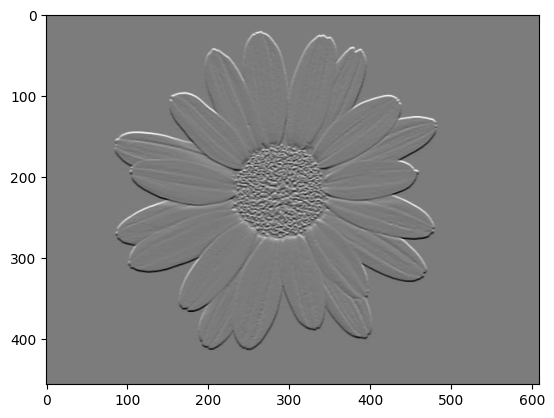

In [12]:
# Display image in matplotlib
plt.imshow(image_conv1, cmap = 'gray')
plt.show()

In [13]:
# Trying one kernel (Prewitt kernel for vertical edges)
kernel2 = np.array([[-1, 0, 1], [-1, 0, 1],[-1, 0, 1]])
image_conv2 = convolution(im_array, kernel2)
print(image_conv2.shape)

(457, 610)


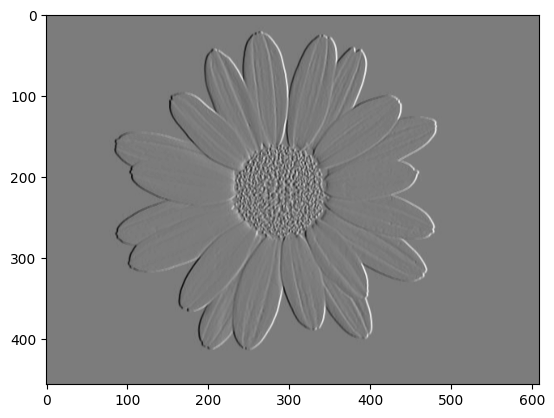

In [14]:
# Display image in matplotlib
plt.imshow(image_conv2, cmap = 'gray')
plt.show()

We might even try different kernels for different effects.

Given the values in the kernel below, can you guess what its effect will be?

In [15]:
# Trying one kernel (Another Prewitt kernel?)
kernel3 = np.array([[ 1,  0, -1], [ 0,  0,  0], [-1,  0,  1]])
image_conv3 = convolution(im_array, kernel3)
print(image_conv3.shape)

(457, 610)


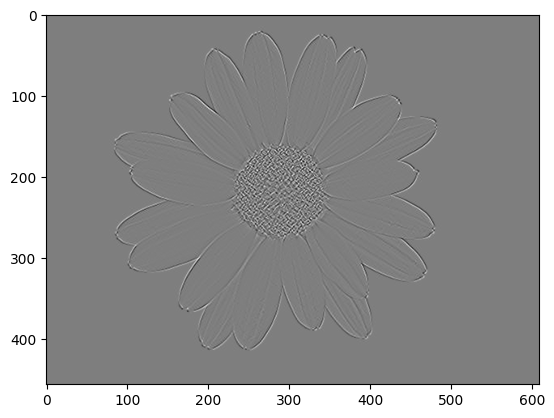

In [16]:
# Display image in matplotlib
plt.imshow(image_conv3, cmap = 'gray')
plt.show()

### Blur and Sharpen

Another kernel we have seen before is the blur one, and we have seen that it can be repeated multiple times to increase the blur effect.

In [17]:
# Blur with 3 by 3 kernel, 10 times in a row
kernel4 = np.array([[1, 1, 1], [1, 1, 1],[1, 1, 1]])/9
image_conv4 = convolution(im_array, kernel4)
image_conv4 = convolution(image_conv4, kernel4)
image_conv4 = convolution(image_conv4, kernel4)
image_conv4 = convolution(image_conv4, kernel4)
image_conv4 = convolution(image_conv4, kernel4)
image_conv4 = convolution(image_conv4, kernel4)
image_conv4 = convolution(image_conv4, kernel4)
image_conv4 = convolution(image_conv4, kernel4)
image_conv4 = convolution(image_conv4, kernel4)
image_conv4 = convolution(image_conv4, kernel4)
image_conv4 = convolution(image_conv4, kernel4)
print(image_conv4.shape)

(437, 590)


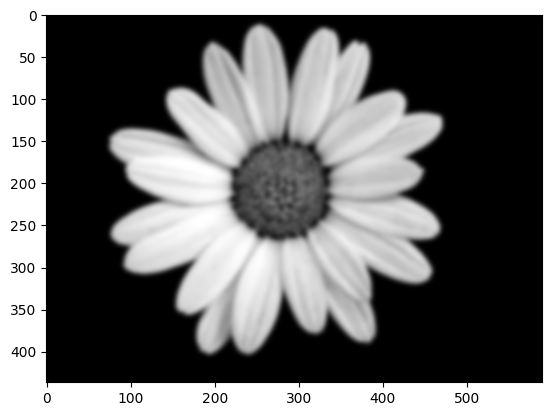

In [18]:
# Display image in matplotlib
plt.imshow(image_conv4, cmap = 'gray')
plt.show()

The opposite of blurring consists of sharpening an image, using convolution involves applying a kernel (matrix) to the image. This operation enhances contrast, i.e. enhances the edges and high-frequency details. The kernel is typically a small matrix with positive and negative values that are used to adjust the brightness of the pixels in the image.

In [19]:
# Sharpen (= improve contrast)
kernel5 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
image_conv5 = convolution(im_array, kernel5)
print(image_conv5.shape)

(457, 610)


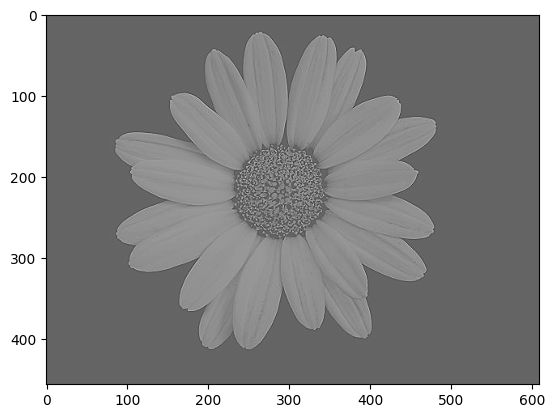

In [20]:
# Display image in matplotlib
plt.imshow(image_conv5, cmap = 'gray')
plt.show()

### Visualizing all images and transformations

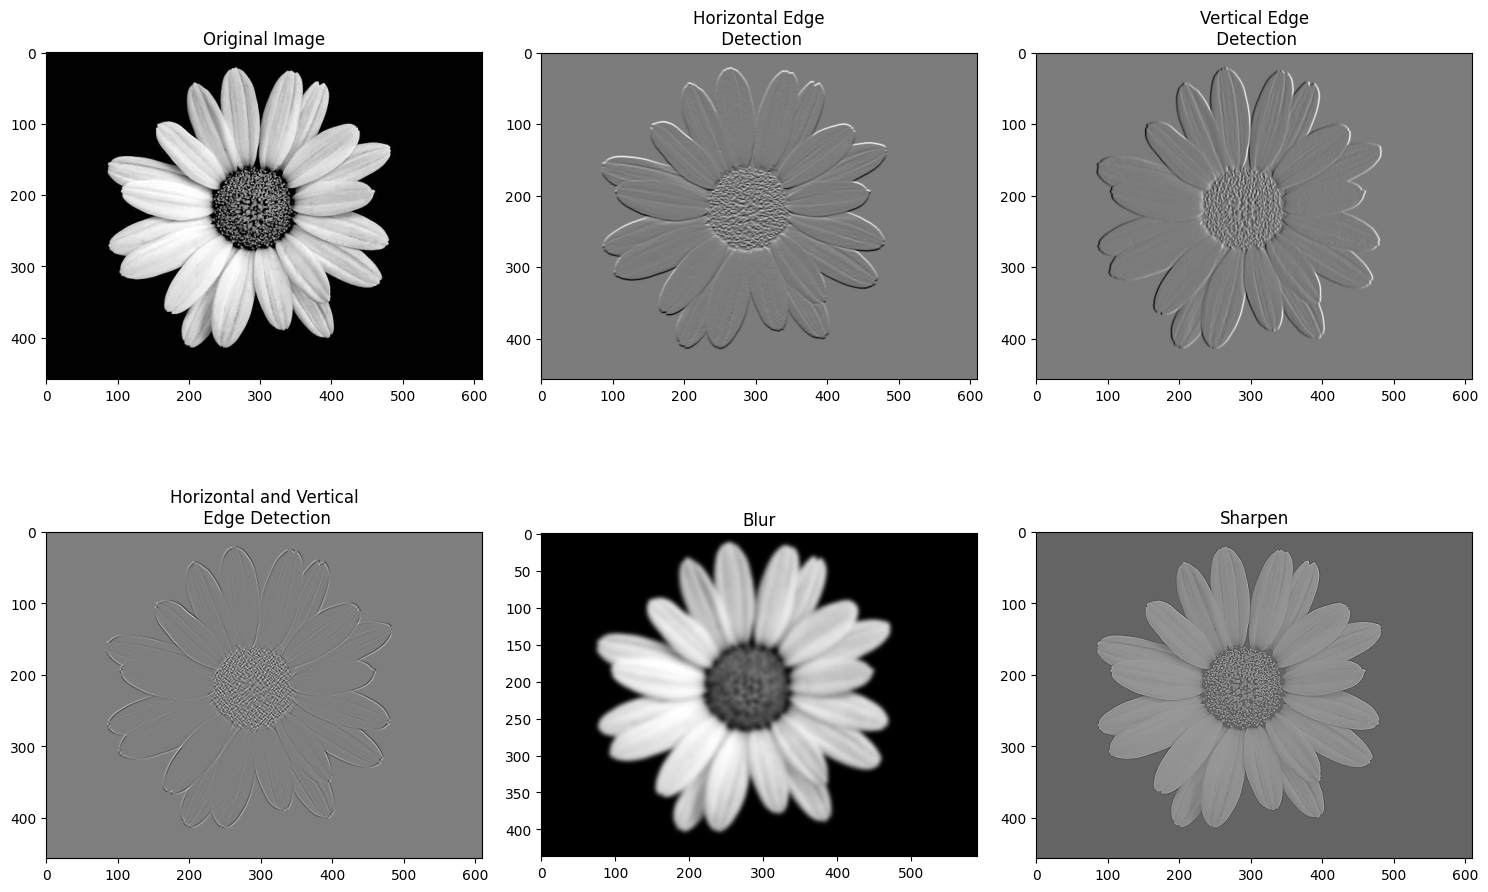

In [21]:
# Display all
fig, axes = plt.subplots(2, 3, figsize = (15, 10))

# Display the images
axes[0, 0].imshow(im_array, cmap = 'gray')
axes[0, 0].set_title('Original Image')
axes[0, 1].imshow(image_conv1, cmap = 'gray')
axes[0, 1].set_title('Horizontal Edge\n Detection')
axes[0, 2].imshow(image_conv2, cmap = 'gray')
axes[0, 2].set_title('Vertical Edge\n Detection')
axes[1, 0].imshow(image_conv3, cmap = 'gray')
axes[1, 0].set_title('Horizontal and Vertical\n Edge Detection')
axes[1, 1].imshow(image_conv4, cmap = 'gray')
axes[1, 1].set_title('Blur')
axes[1, 2].imshow(image_conv5, cmap = 'gray')
axes[1, 2].set_title('Sharpen')

# Adjust the layout
plt.tight_layout()

# Show the figure
plt.show()

### What's next?

In the next notebook, we will implement advanced operations on convolutions, typically padding and striding.